# Exploring Unsupervised Clustering Techniques on Wine Data: A Comparative Analysis of K-Means, Agglomerative Clustering, and DBSCAN
### Unsupervised Algorithms in Machine Learning Final Project

##### Analysis and Report by Courtney Singer, September 2024


## Introduction
This project explores the application of unsupervised machine learning techniques to the Wine dataset, which contains chemical properties of different wine cultivars. The objective is to identify natural groupings within the data based on chemical composition using clustering algorithms. The analysis focuses on three main clustering methods: K-Means, Agglomerative Hierarchical Clustering, and DBSCAN. The performance of each algorithm is evaluated using Silhouette Scores and visualized through PCA, offering insights into the structure of the dataset and the strengths and weaknesses of each clustering method.


----
## Data Summary

The Wine dataset consists of the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. This dataset contains 178 samples, each representing a different wine. The analysis quantifies 13 continuous features, which are chemical properties of the wine, and include:

-	Alcohol content (float)
-	Malic acid (float)
-	Ash (float)
-	Alkalinity of ash (float)
-	Magnesium (float)
-	Total phenols (float)
-	Flavanoids (float)
-	Nonflavanoid phenols (float)
-	Proanthocyanins (float)
-	Color intensity (float)
-	Hue (float)
-	OD280/OD315 of diluted wines (float)
-	Proline (float)

Key Information:

- Number of samples: 178
- Number of features: 13 (continuous)
- Target variable: Although the dataset contains labels for three types of wine (cultivars), these labels will not be used for clustering, as this is an unsupervised learning problem.
- Data types: All features are numeric, representing chemical properties.
- Missing values: No missing values are present in the dataset, as it has been preprocessed and prepared for analysis.


Since this is an unsupervised learning problem, the target labels corresponding to the three different wine cultivars will be excluded, and the focus will be on clustering the wines based on their chemical properties to discover natural groupings.

### Method of Data Collection and Provenance

TThe Wine dataset was originally made available through UCI’s Machine Learning Repository, collected by the Institute of Pharmaceutical and Food Analysis and Technologies in Italy. The chemical analysis was conducted in a controlled laboratory setting to ensure precise measurements of the wines’ chemical composition.

This dataset has been used in various machine learning studies, making it a reliable choice for exploratory data analysis (EDA) and clustering tasks. The dataset has been preprocessed, and no missing values are present.

The Wine dataset is publicly available for educational purposes and can be accessed at the following link https://archive.ics.uci.edu/dataset/109/wine .


----
## Unsupervised Learning Problem 

The goal of this project is to group different wine samples into clusters based on their chemical characteristics using clustering techniques. Although the dataset contains labels for the three types of wine (cultivars), this will be treated as an unsupervised learning problem where the clustering algorithms will determine groupings without using the true labels. After clustering, we can use the labels to evaluate the quality of the clustering results.


**Objective:**
The objective is to apply clustering algorithms, such as K-Means, to categorize the wines into distinct groups based on their chemical properties. We expect a natural grouping into three clusters given that the dataset contains three wine types, but the algorithms will not be provided this information during training.


**Approach:**
1.	Clustering Methods: To achieve this, we employ three clustering algorithms:	
    1.	K-Means Clustering – a partition-based method that aims to divide the data into K clusters by minimizing the within-cluster sum of squares.
	2.	Agglomerative Hierarchical Clustering – a hierarchical method that builds clusters step by step, based on the similarity of data points.
	3.	DBSCAN (Density-Based Spatial Clustering of Applications with Noise) – a density-based clustering method that can detect clusters of varying shapes and handle noise.
        
2.	Evaluation Metrics: The quality of the clusters will be evaluated using silhouette scores, which measure how similar a sample is to its own cluster compared to other clusters. 
    
3. Dimensionality Reduction: To better visualize the clustering results, we will apply Principal Component Analysis (PCA) to reduce the dimensionality of the data and display the clusters in 2D or 3D space. This will help interpret the cluster structures more easily.

Clustering is an appropriate method for this problem because we aim to discover natural groupings in the dataset based on the wines’ chemical properties. After clustering, the labels will be used for post-analysis to evaluate the cluster quality, but the primary interest lies in understanding how well the wines group based solely on their features.


----
## Import Data and Required Packages

To begin the analysis, we first import the necessary libraries and load the Wine dataset.  The key libraries used include:
- Pandas and NumPy for data manipulation.
- Scikit-learn for clustering algorithms (K-Means, Agglomerative Clustering, DBSCAN), dimensionality reduction (PCA, t-SNE), and evaluation metrics like silhouette score.
- Seaborn and Matplotlib for visualizations.
- SciPy for hierarchical clustering and statistical tests.

We use the load_wine() function from Scikit-learn to load the Wine dataset, which contains 13 chemical properties for each wine sample. The dataset is then converted into a Pandas DataFrame for further analysis.

In [54]:
# Data handling and preprocessing
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Clustering methods
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Evaluation metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Dimensionality reduction and visualization
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Hierarchical clustering tools
from scipy.cluster.hierarchy import dendrogram, linkage

# Statistical tools
from scipy.stats import f_oneway

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Wine dataset
wine_df = pd.DataFrame(load_wine().data, columns=load_wine().feature_names)

----
----
## Exploratory Data Analysis 

### Data Overview
Before applying any clustering algorithms, it’s important to ensure the data is clean and complete. Checking for missing values helps us confirm that all features have complete data, as missing data could distort clustering results or require imputation that might affect the analysis.


In [55]:
# Inspecting data structure and types
wine_df.info()

# Viewing the first few rows of the dataset
wine_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


#### Observetions
- The dataset contains 178 samples with 13 numerical features representing chemical properties of the wines.
- No missing values are present, and all data types are numerical, making the dataset ready for clustering and further analysis.

----
### Data Features

Before applying any data transformations, it’s important to explore the distribution of the wine dataset features. The box plots below help us visualize the spread of each feature and identify potential outliers, providing critical insights into the data before clustering.


#### Box Plot

Visualizing the distribution of each feature using box plots allows us to detect potential outliers and understand the spread of values within each feature. Outliers can disproportionately influence distance-based clustering methods, so identifying them early ensures that we handle them appropriately to improve clustering performance.

The box plots illustrate the distribution of the 13 chemical properties of each wine, showing key statistics such as the quartiles, medians, and potential outliers. This visualization helps identify which features have wide ranges or extreme values, which may need to be addressed before applying clustering algorithms.

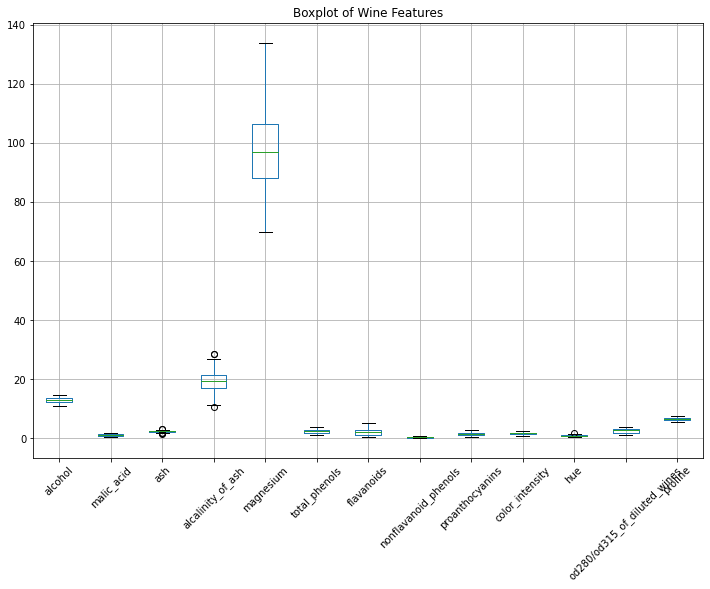

In [109]:
## Boxplot for each feature
# This code generates box plots for all the features to understand the distribution and detect outliers.

# Create box plots for each feature
plt.figure(figsize=(12,8))
wine_df.boxplot(rot=45)
plt.title("Boxplot of Wine Features")
plt.show()

#### Observations 

Outliers
- Magnesium and proline show visible outliers, which could influence the clustering process. Handling these outliers, whether by removing or transforming them, may improve the performance of clustering algorithms like K-Means.
- OD280/OD315 of diluted wines also has a clear extreme outlier compared to the rest of its values.

Feature Ranges
- Features such as total phenols and ash have relatively narrow ranges, while others like proline have a much wider range of values, indicating potential variance in how these features will contribute to cluster formation.
- Alcohol and color intensity show more uniform distributions, which suggests that these features might play a central role in separating wines into distinct clusters.

#### Histograms

Histograms help us visualize the frequency distribution of each feature in the dataset, providing insights into their skewness and any multimodality. This step is essential for identifying whether features are normally distributed or skewed, as this will impact clustering performance and inform decisions on data transformations (e.g., log transformations or scaling).



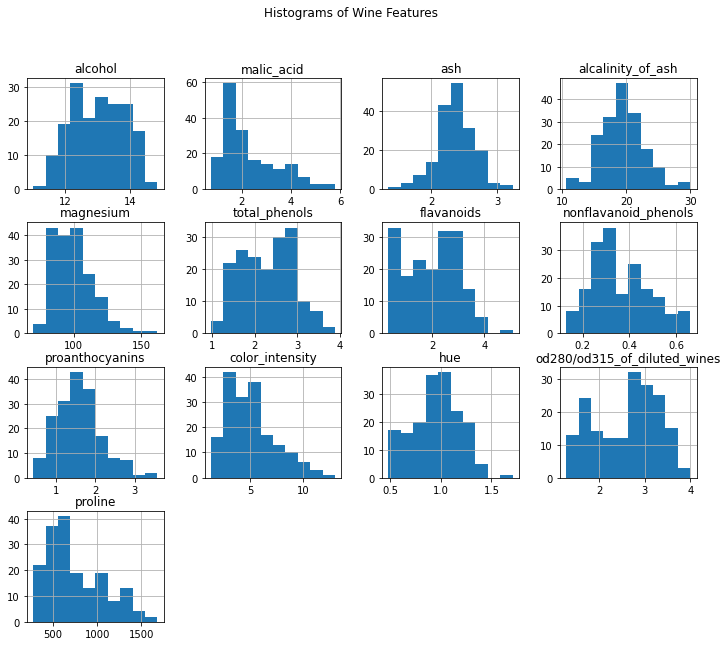

In [57]:
# Histograms for each feature
# This code generates histograms for each feature to understand the frequency distribution of values.
wine_df.hist(bins=10, figsize=(12,10))
plt.suptitle("Histograms of Wine Features")
plt.show()

##### Observations:
-	Skewed Features:
    - Alcohol, proline, and malic acid display noticeable skewness, particularly with long tails to the right, suggesting a positive skew. Skewed distributions can lead to clustering challenges, as algorithms like K-Means may perform better when features are closer to normal distributions. These features may benefit from transformations such as a log transformation to normalize the distribution.
    - Proline is especially skewed, with a long right tail, indicating that while most wine samples have lower proline values, a few samples have significantly higher values, which could distort clustering.
- Multimodal Features:
    - Features such as color intensity and OD280/OD315 of diluted wines show signs of multimodality, indicating that the dataset may contain distinct groups of samples. This suggests that these features may play a significant role in defining the clusters and separating the wines into groups.
- Normal Features:
    - Other features, such as magnesium and total phenols, exhibit more normal distributions, with no extreme skew or multimodality. These features may not require transformation and will likely contribute to cluster formation in a balanced way.

#### Key Findings from Data Features

1.	Skewed Distributions
    -	Several features, such as alcohol, proline, and malic acid, show skewed distributions, particularly with long right tails. These features may require transformations (e.g., log transformation) to reduce skewness and improve clustering performance.
    -	Proline, in particular, has a significant skew, which could disproportionately affect clustering results and may need to be transformed to minimize its influence.
    
    
2.	Handling Outliers
    -	Features like magnesium and proline exhibit clear outliers. Handling these outliers—either by capping or removing them—will be necessary to ensure that they don’t distort the clustering process.
    - OD280/OD315 of diluted wines also has one extreme outlier, which may need to be addressed.
    
    
    
3.	Range of Features
    -		Features like total phenols and ash have relatively narrow distributions, while others, such as proline, span a much wider range. This variation in range will require scaling to ensure that no feature dominates the clustering algorithm due to its larger magnitude.
    
    
4.	Potential for Dimensionality Reduction:
    -		The multimodal distribution of features like color intensity and OD280/OD315 of diluted wines suggests that these features may play a crucial role in defining clusters. Dimensionality reduction techniques, like PCA, may be applied to visualize these patterns more clearly.

----
### Feature Correlations

Understanding how the features relate to each other is crucial for effective data preprocessing and clustering. Correlations between features can reveal redundancy or relationships that could impact clustering algorithms. Highly correlated features might have similar effects on cluster formation, potentially leading to bias if they dominate the clustering process.

In this section, we use a correlation matrix and heatmap to quantify the relationships between features and visualize them. This will help identify:

1.	Strong correlations: Features that are highly positively or negatively correlated, indicating a potential need for dimensionality reduction or feature engineering to minimize redundancy.
2.	Feature independence: Features that are not strongly correlated to others, which are likely to contribute uniquely to the clustering process.

#### Correlation Matrix Using a Heatmap
Checking for correlations between features is important to understand relationships that may affect clustering. Highly correlated features may lead to redundancy, where one feature dominates the clustering process. Understanding feature correlations allows us to determine if any features should be removed or transformed to avoid redundancy.


The correlation matrix will help us understand how features relate to each other by calculating the Pearson correlation coefficient for each pair of features. This coefficient ranges from -1 to 1:
-	1: Perfect positive correlation
- 0: No correlation
-	-1: Perfect negative correlation

The heatmap visualizes these correlations, making it easier to detect strong relationships between features that might affect clustering or require further preprocessing, such as applying PCA to manage multicollinearity.

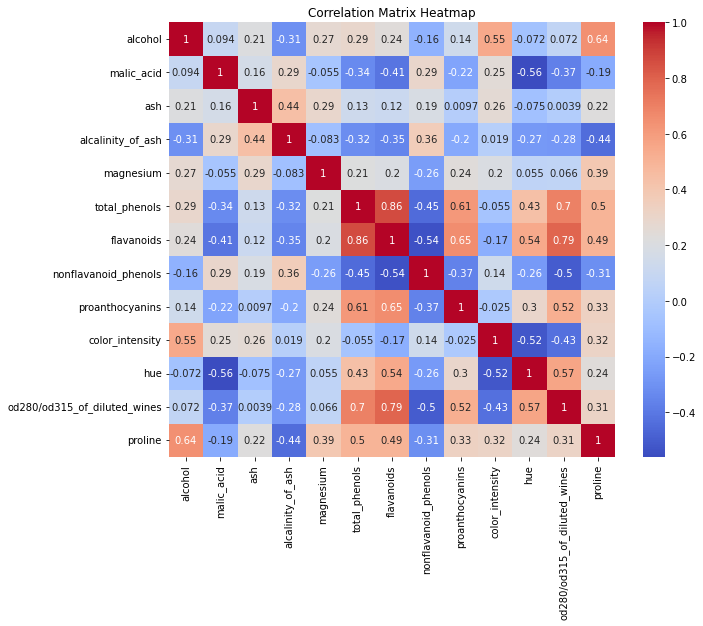

In [58]:
# Correlation Heatmap
# This code generates a heatmap to show correlations between all features in the dataset.

# Generate the correlation matrix
corr = wine_df.corr()

# Plot the correlation heatmap–
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

**Strong Positive Correlations**
1.	Flavanoids and Total Phenols (0.86):
    -	This strong correlation makes sense, as both flavanoids and phenols are chemical compounds in wine that can be related to the quality and taste. They may move together in wine samples, where higher levels of one often mean higher levels of the other.
2.	OD280/OD315 of Diluted Wines and Flavanoids (0.79):
    - OD280/OD315 measures phenolic content, and flavanoids are a type of phenol. Therefore, it’s reasonable to expect a strong correlation between these two features. This also suggests that wines high in phenols (and therefore flavanoids) tend to score highly on this measure.
3.	Alcohol and Proline (0.64):
    - Proline is an amino acid that can be found in wine, and its concentration may be influenced by the fermentation process, which is also linked to alcohol production. The correlation between alcohol and proline suggests that higher alcohol wines may also have higher proline levels.
4.	Alcohol and Color Intensity (0.55):
    - The positive correlation between alcohol and color intensity may indicate that more intense wines (deeper color) tend to have higher alcohol content, likely due to the grape varieties or production techniques.

**Moderate Negative Correlations**
1.	Flavanoids and Non-Flavanoid Phenols (-0.54)
    - These two types of phenolic compounds are inversely related. Wines with higher levels of flavanoids tend to have lower levels of non-flavanoid phenols, which are different compounds affecting wine’s chemical makeup.
2.	Hue and Flavanoids (-0.52):
    - This suggests that wines with more flavanoids tend to have lower hues (color tones). Since flavanoids contribute to the taste and structure of wine, their concentration could impact the appearance of the wine as well.
    
Several features, such as flavonoids and total phenols, show high correlation. While highly correlated features can sometimes introduce redundancy, removing them is not necessary in this case due to the following reasons:

- **Preserving Domain-Specific Information**: Both flavonoids and total phenols are chemically distinct but related compounds that are important for understanding the quality and composition of wine. Removing one of them might result in a loss of critical information that could contribute to differentiating wines based on their chemical properties.
- **Clustering and Feature Interpretation**: Retaining correlated features helps to maintain interpretability in clustering results. By keeping features that reflect different aspects of the wine’s chemical makeup, we ensure that the clustering model accounts for the full breadth of meaningful distinctions between wine types.
- **Dimensionality Reduction Through PCA**: Although these features are correlated, dimensionality reduction techniques like PCA (Principal Component Analysis) are applied later in the analysis to reduce redundancy and account for correlated features. PCA transforms the feature space into a set of orthogonal components, which mitigates the issue of feature correlation without manually removing features beforehand.

Therefore, removing highly correlated features is not necessary for this analysis, as they contribute valuable information to the clustering process and will be accounted for in the dimensionality reduction step.


#### Observations:
- Impact on Clustering: Strong correlations between features, such as flavanoids and total phenols, suggest that these features could contribute similarly to clustering. If necessary, dimensionality reduction techniques like PCA can help manage redundancy.
- Actionable Insights: Highly correlated features like alcohol and proline may need to be transformed or treated carefully to avoid overemphasizing their influence on cluster formation.

#### Scatter Plots
Scatter plots help visualize relationships between two important features. For clustering, these plots can reveal whether distinct groups or clusters are likely to form based on feature combinations. This insight helps us anticipate which features may contribute to cluster separation and guides model development.

##### Alcohol vs. Color Intensity
The scatter plot below examines the relationship between alcohol and color intensity, two features that are expected to be significant for clustering based on their chemical relevance and moderate correlation as observed in the heatmap. Investigating these features can help identify patterns that contribute to distinct groupings in the dataset.

This plot was selected because both alcohol and color intensity are key indicators of wine quality and play a role in differentiating wines. Their moderate correlation suggests that these features may work together to define important clusters in the dataset, especially given their chemical and sensory significance.

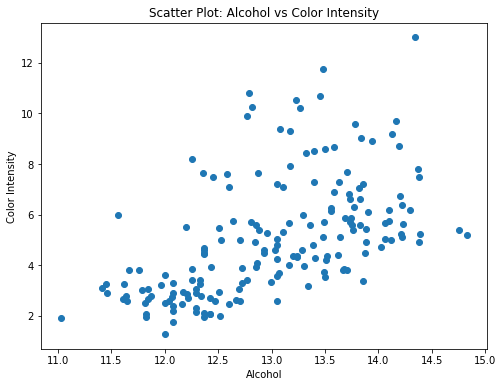

In [59]:
# Scatter Plot for two features (Alcohol vs Color Intensity)
# This code generates a scatter plot to explore the relationship between two features: alcohol and color intensity.
# Scatter plot for Alcohol vs Color Intensity
plt.figure(figsize=(8,6))
plt.scatter(wine_df['alcohol'], wine_df['color_intensity'])
plt.xlabel('Alcohol')
plt.ylabel('Color Intensity')
plt.title('Scatter Plot: Alcohol vs Color Intensity')
plt.show()

##### Observations:
- There is a moderate positive correlation between alcohol and color intensity, with a clear upward trend. Wines with higher alcohol content generally tend to have higher color intensity, as shown in the scatter plot.
- This relationship could suggest that these two features will play a significant role in defining clusters, particularly for wines with higher alcohol and deeper color intensity, which may naturally form distinct groups.


##### Flavanoids vs. Total Phenols
Both flavanoids and total phenols are highly correlated (correlation = 0.86), indicating that these two features likely move together. While this strong correlation might suggest some redundancy between the two, investigating their relationship can provide insights into how different chemical properties of the wine contribute to clustering.

Despite the correlation, their relationship could still clarify distinctions between wine clusters. Total phenols and flavanoids both influence the quality and sensory characteristics of wine, and this relationship may help identify wines with similar chemical compositions.

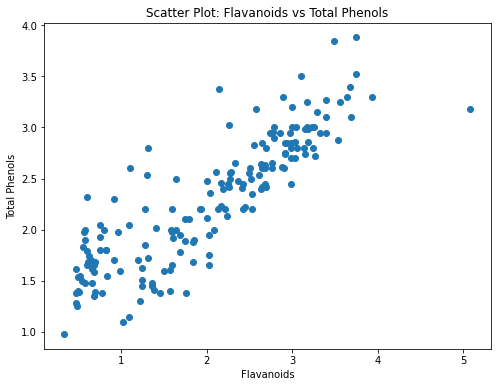

In [60]:
# Scatter plot for Flavanoids vs Total Phenols
plt.figure(figsize=(8,6))
plt.scatter(wine_df['flavanoids'], wine_df['total_phenols'])
plt.xlabel('Flavanoids')
plt.ylabel('Total Phenols')
plt.title('Scatter Plot: Flavanoids vs Total Phenols')
plt.show()

##### Observations:

- The scatter plot shows a strong positive correlation between flavanoids and total phenols. As flavanoid content increases, the total phenol content tends to increase as well, indicating that these two compounds are closely related in the wine samples.
- This relationship is important to consider for clustering, as features that are highly correlated may provide similar information. Dimensionality reduction techniques like PCA might help manage this redundancy, ensuring that the clustering process isn’t dominated by these two highly correlated features.


##### Proline vs. Alcohol
Proline is a highly variable feature, as seen from its wide distribution and presence of outliers in the box plot. Alcohol, on the other hand, is a distinguishing factor for wines. Analyzing these two features together could reveal distinct groupings or patterns, particularly since proline’s wide range and potential outliers may be linked to unique wine types.

By examining the scatter plot for proline and alcohol, we aim to uncover whether these two features can differentiate wines into distinct clusters. Proline’s high variability and relationship with alcohol could play a key role in cluster separation.

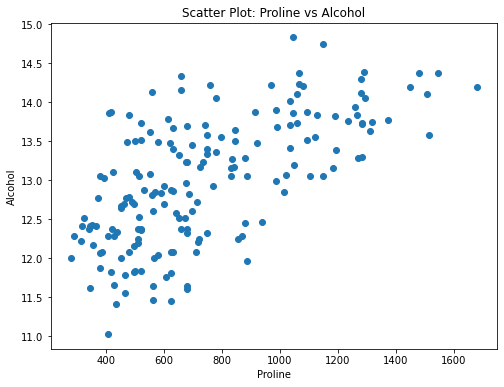

In [61]:
# Scatter plot for Proline vs Alcohol
plt.figure(figsize=(8,6))
plt.scatter(wine_df['proline'], wine_df['alcohol'])
plt.xlabel('Proline')
plt.ylabel('Alcohol')
plt.title('Scatter Plot: Proline vs Alcohol')
plt.show()

##### Observations:

- The scatter plot shows a moderate positive relationship between proline and alcohol. Higher alcohol content tends to correspond with higher proline levels, though the relationship is more variable at lower levels of proline.
- The wide range of proline values, especially at higher levels, suggests that this feature may be important in separating wines with higher proline content into distinct groups, potentially distinguishing higher-alcohol wines from others.


### Key Findings for Feature Correlations

From the correlation matrix and scatterplots:
-	Flavanoids, total phenols, and OD280/OD315 are highly correlated, suggesting redundancy. These features measure related chemical properties and could potentially be reduced through dimensionality reduction techniques like PCA.
-	Alcohol shows moderate correlations with several other features, including proline and color intensity, which reinforces the importance of alcohol as a distinguishing factor for wine clustering.
-	Hue has negative correlations with flavanoids and total phenols, indicating that the visual appearance of the wine (in terms of hue) might be inversely related to its phenolic content.


----
### Data Cleaning

Based on the exploration of the above steps, there are some cleaning steps we can perform on the data to prepare it for model training. 

#### Check for Missing Data

Before proceeding with clustering, it’s essential to check the dataset for missing values, as they can negatively impact the performance of machine learning models. Missing data can lead to incomplete analyses, biased results, or even prevent certain models from functioning correctly.

In this step, we check if the Wine dataset contains any missing values. Fortunately, as shown in the output, there are no missing values across all features. This confirms that the dataset is complete and ready for further processing without the need for imputation or data substitution.

In [62]:
# Check for missing values in the dataset
missing_data = wine_df.isnull().sum()

# Display missing data
print("Missing data per feature:")
print(missing_data)

Missing data per feature:
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64


The Wine dataset contains no missing values, meaning that all features have complete data for all 178 samples. Since no data imputation or handling is required for missing values, we can proceed to the next step of identifying and handling outliers, which may need special attention before clustering.


 #### Identify Outliers
Outliers can distort the clustering process, especially in distance-based methods like K-Means. By detecting and handling outliers, we ensure that these extreme values do not skew the results or lead to poorly defined clusters. Removing or capping outliers helps create more balanced clusters and improves model stability.
It’s essential to detect outliers and decide how to handle them before proceeding with clustering.

In earlier EDA steps, we identified potential outliers using box plots for features like proline and magnesium. Now, we use the Interquartile Range (IQR) Method to programmatically detect outliers.

The IQR method works by identifying values that fall outside of 1.5 times the interquartile range, signaling that they are extreme compared to the rest of the data.

In [63]:
# Define a function to detect outliers using IQR
def detect_outliers_iqr(df):
    outliers_dict = {}
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers_dict[column] = outliers
    return outliers_dict

# Detect outliers
outliers = detect_outliers_iqr(wine_df)

# Display outliers for each feature
for feature, outliers_df in outliers.items():
    print(f"Outliers for {feature}:")
    print(outliers_df[feature])
    print("\n")

Outliers for alcohol:
Series([], Name: alcohol, dtype: float64)


Outliers for malic_acid:
123    5.80
137    5.51
173    5.65
Name: malic_acid, dtype: float64


Outliers for ash:
25     3.22
59     1.36
121    3.23
Name: ash, dtype: float64


Outliers for alcalinity_of_ash:
59     10.6
73     30.0
121    28.5
127    28.5
Name: alcalinity_of_ash, dtype: float64


Outliers for magnesium:
69    151.0
73    139.0
78    136.0
95    162.0
Name: magnesium, dtype: float64


Outliers for total_phenols:
Series([], Name: total_phenols, dtype: float64)


Outliers for flavanoids:
Series([], Name: flavanoids, dtype: float64)


Outliers for nonflavanoid_phenols:
Series([], Name: nonflavanoid_phenols, dtype: float64)


Outliers for proanthocyanins:
95     3.28
110    3.58
Name: proanthocyanins, dtype: float64


Outliers for color_intensity:
151    10.80
158    13.00
159    11.75
166    10.68
Name: color_intensity, dtype: float64


Outliers for hue:
115    1.71
Name: hue, dtype: float64


Outliers for

There are outliers are detected in several features, including malic acid, ash, magnesium, and color intensity.

There are two main strategies for handling outliers:

1.	Removing extreme outliers: Features like magnesium and color intensity have outliers that may skew clustering results, especially in distance-based methods like K-Means. We will remove these extreme values to avoid distorting cluster formation.
2.	Capping outliers: In cases like malic acid and proanthocyanins, the outliers are less extreme, so capping their values at the upper and lower bounds can help prevent them from overly influencing the clustering process while still retaining valuable data.


In [110]:
# 1. Remove extreme outliers in 'magnesium' and 'color_intensity'
for column in ['magnesium', 'color_intensity']:
    Q1 = wine_df[column].quantile(0.25)
    Q3 = wine_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Keep only rows where values are within IQR bounds
    wine_df = wine_df[(wine_df[column] >= lower_bound) & (wine_df[column] <= upper_bound)]

# 2. Cap outliers in 'malic_acid' and 'proanthocyanins'
for column in ['malic_acid', 'proanthocyanins']:
    Q1 = wine_df[column].quantile(0.25)
    Q3 = wine_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Cap values beyond the upper and lower bound
    wine_df[column] = np.where(wine_df[column] > upper_bound, upper_bound, wine_df[column])
    wine_df[column] = np.where(wine_df[column] < lower_bound, lower_bound, wine_df[column])


----
### Data Transformation

The Wine dataset is composed of various chemical measurements, and in some cases, certain features might benefit from a log transformation or other non-linear transformations to improve the clustering performance. 

#### Log Transformation

Performing a log transformation on features before training models may offer the following
- Improved Clustering: Log transformation compresses the range of features and can make highly skewed features more normal. This can lead to more balanced and interpretable clusters, as no single feature (like proline) dominates the Euclidean distance calculation in K-Means or hierarchical clustering.
- Feature Balance: By transforming features that have large variances or are highly skewed, you’ll ensure that all features contribute more equally to the clustering process.

To determin which factors may benefit from a log transfromation, look for the following:
1.	Highly Skewed Distributions:Features with highly skewed distributions can benefit from log transformation because it compresses the range of larger values and can make the distribution more symmetric.
2.	Large Differences in Magnitude: Log transformation is particularly useful when the differences between values are large. For example, in the Wine dataset, proline has a much larger range compared to other features like alcohol or malic acid. By applying a log transformation, you can reduce the impact of outliers or very large values, allowing the clustering algorithm to treat all features more equally.

Based on the criteria above, the following features in the Wine dataset were selected for log transformation:
-	Proline: This feature is highly skewed and has a wide range, making it a good candidate for log transformation. Transforming it might help reduce the dominance of very high proline values in the clustering process.
-	Malic Acid: Slightly skewed and would likely benefit from log transformation to make its distribution more normal.
-	Color Intensity: Depending on how you observe its distribution, you might also consider applying a log transformation to this feature.



In [65]:
# Apply log transformation to proline and malic_acid, and others if needed
wine_df['proline'] = np.log(wine_df['proline'] + 1)  # Adding 1 to avoid log(0)
wine_df['malic_acid'] = np.log(wine_df['malic_acid'] + 1)
wine_df['color_intensity'] = np.log(wine_df['color_intensity'] + 1)

# Display the first few rows after log transformation
print(wine_df[['proline', 'malic_acid', 'color_intensity']].head())

    proline  malic_acid  color_intensity
0  6.971669    0.996949         1.893112
1  6.957497    1.022451         1.682688
2  7.078342    1.211941         1.899118
3  7.300473    1.081805         2.174752
4  6.601230    1.278152         1.671473


----
### Data Scaling and Normalization
This step is essential because different features in the Wine dataset are measured in different units (e.g., alcohol is in percentages, magnesium is in mg/L), which can heavily influence clustering algorithms like K-Means.

K-Means and other clustering algorithms are sensitive to the scale of features. Since K-Means uses Euclidean distance to measure similarity between points, features with larger ranges will dominate the distance calculation, leading to biased clustering results.

StandardScaler standardizes the data by subtracting the mean and dividing by the standard deviation, ensuring that all features have a mean of 0 and a variance of 1. This method is effective when the clustering algorithm assumes normality or when features have different units of measurement.

StandardScaler is generally preferred for clustering tasks because it maintains the relative differences between data points while standardizing them to a common scale. Unlike MinMaxScaler, it does not constrain the data within a fixed range, which allows more flexibility for algorithms like K-Means.

With the features standardized, the dataset is now ready for clustering analysis. This transformation ensures that no feature dominates the clustering process due to differences in measurement units, leading to more balanced and meaningful cluster formation.

In [112]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_wine = scaler.fit_transform(wine_df)

# Convert scaled data back to DataFrame for further analysis
scaled_wine_df = pd.DataFrame(scaled_wine, columns=wine_df.columns)

# Display the first few rows of the scaled data
print(scaled_wine_df.head())

    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  1.507966   -0.537254  0.229611          -1.180056   2.288325   
1  0.242189   -0.454649 -0.843565          -2.540991   0.109934   
2  0.193032    0.159135  1.117756          -0.252146   0.190615   
3  1.680014   -0.262392  0.488653          -0.808892   1.158789   
4  0.291345    0.373602  1.857877           0.490183   1.562194   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.810542    1.011268             -0.674539         1.392271   
1       0.570745    0.713306             -0.836770        -0.515378   
2       0.810542    1.190044             -0.512308         2.374427   
3       2.489122    1.438345             -0.999001         1.184507   
4       0.810542    0.643782              0.217731         0.504553   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0         0.466247  0.364436                      1.835189  1.053833  
1        -0.118696  0.409451

----
### Important Data Features

Based on exploratory data analysis, the following features are likely to play a key role in differentiating wine types during clustering:

1.	Alcohol:
    - Alcohol content is a primary characteristic that separates wines. Its positive correlation with color intensity (0.55) and proline (0.64) suggests that it plays a significant role in forming clusters.
2.	Color Intensity:
    - This feature is a visual marker of wine quality and variety. Moderate positive correlations with alcohol and proline indicate that it contributes meaningfully to clustering, especially after handling outliers.
3.	Proline:
    - Known for its high variability, proline is linked with wine fermentation and aging processes. Its wide range of values and strong correlation with alcohol make it a key factor for separating different wine types.
4.	Flavanoids and Total Phenols:
    - These chemical compounds affect wine flavor and quality. Their strong correlation (0.86) suggests they work together in forming clusters, though some redundancy might be present.
5.	Malic Acid:
   - Although it shows weaker correlations with other features, malic acid is crucial in differentiating wines based on their fermentation processes and acidity. The log transformation helps balance its skewness, making it a valuable feature for clustering.

In the final analysis, evaluating how these features contribute to clustering (e.g., through feature importance or PCA) will confirm their significance.


----
----
## Clustering Models

### K-Means Clustering

K-Means is a widely used and efficient clustering algorithm, particularly well-suited for datasets where distinct clusters are expected to form based on feature similarities. The goal of K-Means is to partition the data into K clusters, where each data point belongs to the cluster with the nearest centroid (the mean of all points within the cluster).

K-Means is well-suited for the Wine dataset as we expect the samples to naturally separate into distinct clusters based on their chemical properties, such as alcohol content, proline, and color intensity. These properties are expected to vary between different types of wine, making K-Means an effective method for discovering these natural groupings.

The objective of applying K-Means here is to partition the wine samples into clusters that capture the inherent similarities based on their chemical compositions.


Evaluating K-Means Performance

To evaluate the effectiveness of K-Means, we use two key methods:
- Elbow Method
- Silhouette Scores


#### Elbow Method

The Elbow Method is used to determine the optimal number of clusters by plotting the within-cluster sum of squares (WCSS) for different values of K. The optimal number of clusters is indicated by a noticeable “elbow” in the plot, where adding more clusters beyond this point results in diminishing returns in reducing WCSS.

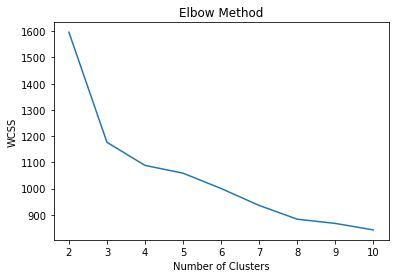

In [113]:
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_wine_df)
    wcss.append(kmeans.inertia_)

# Elbow Method Plot
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

While the Elbow Method suggests that 3 clusters may be optimal due to the noticeable "elbow" in the plot, choosing a higher number of clusters would lead to marginal gains in reducing the WCSS (within-cluster sum of squares), potentially resulting in overfitting. By selecting K=3, we maintain a balance between model complexity and cluster compactness.

#### Silhouette Score

The Silhouette Score measures the quality of clustering by evaluating how similar each data point is to its assigned cluster compared to other clusters. The score ranges from -1 to 1, with higher values indicating well-defined clusters, as points are closer to their own cluster and far from other clusters.

After identifying K=3 as the optimal number of clusters, we evaluate the clustering quality using the Silhouette Score.

In [136]:
import pandas as pd

# Applying K-Means with optimal number of clusters (assume 3 for example)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10, max_iter=300)
kmeans_labels = kmeans.fit_predict(scaled_wine_df)

# Evaluate K-Means clustering with silhouette score
silhouette_avg = silhouette_score(scaled_wine_df, kmeans_labels)
print(f"K-Means Silhouette Score: {silhouette_avg}")

# Create a DataFrame to store Silhouette scores (if empty, create one)
if 'scores_df' not in locals():  # Check if the DataFrame exists
    scores_df = pd.DataFrame(columns=['Model', 'Silhouette Score','Inertia Score' ])

# Add the K-Means Silhouette Score to the DataFrame using pd.concat
new_row = pd.DataFrame({
    'Model': ['K-Means'],
    'Silhouette Score': [silhouette_avg]
})

# Only concatenate if new_row is not empty
if not scores_df.empty:
    scores_df = pd.concat([silhouette_df, new_row], ignore_index=True)
else:
    scores_df = new_row

# Display the DataFrame with K-Means score
display(scores_df)

K-Means Silhouette Score: 0.30728400120241434


,Model,Silhouette Score
0,K-Means,0.307284
1,K-Means,0.307284


The Silhouette Score of 0.297 indicates that the clusters are somewhat distinguishable, but there is likely some overlap between them or poorly defined boundaries. While this score suggests that K-Means found some structure in the data, it may indicate that the clusters could be refined further. We may either experiment with additional parameters or explore alternative clustering methods to improve the cluster definition.


##### Refining Cluster Quality with Silhouette Scores

While the Elbow Method suggests K=3 as the optimal number of clusters, it’s important to evaluate the quality of clustering more precisely. We use the Silhouette Score, which measures how well each point fits within its cluster versus other clusters. A higher silhouette score indicates better-defined clusters.

We calculate the Silhouette Scores for different values of K (ranging from 2 to 10) to compare and validate the quality of clusters. The following plot shows the Silhouette Scores for each K:

K-Means Silhouette Score with 2 clusters: 0.2685182690501567
K-Means Silhouette Score with 3 clusters: 0.30728400120241434
K-Means Silhouette Score with 4 clusters: 0.2758582612595681
K-Means Silhouette Score with 5 clusters: 0.20727250228931707
K-Means Silhouette Score with 6 clusters: 0.19019875572008024
K-Means Silhouette Score with 7 clusters: 0.1921507360423541
K-Means Silhouette Score with 8 clusters: 0.12562435614107784
K-Means Silhouette Score with 9 clusters: 0.11101138924867894
K-Means Silhouette Score with 10 clusters: 0.11182735305731024


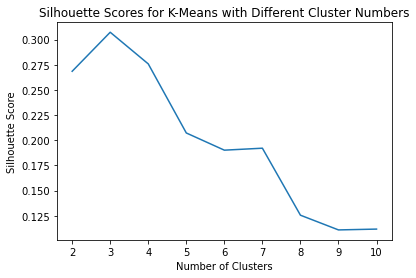

In [115]:
# Calculate Silhouette scores for 2-10 clusers 

# Range of cluster numbers to evaluate (from 2 to 10)
range_n_clusters = range(2, 11)

# Dictionary to store silhouette scores for each cluster number
silhouette_scores = {}

# Loop over the range of cluster numbers and calculate silhouette score for each
for n_clusters in range_n_clusters:
    # Apply K-Means clustering with the current number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(scaled_wine_df)
    
    # Calculate the silhouette score
    silhouette_avg = silhouette_score(scaled_wine_df, kmeans_labels)
    silhouette_scores[n_clusters] = silhouette_avg
    
    # Print silhouette score for the current number of clusters
    print(f"K-Means Silhouette Score with {n_clusters} clusters: {silhouette_avg}")

# Plot the silhouette scores for different cluster numbers
plt.plot(range_n_clusters, list(silhouette_scores.values()))
plt.title('Silhouette Scores for K-Means with Different Cluster Numbers')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

For K-Means, we chose n_clusters=3, based on the elbow method and silhouette score analysis. The elbow method, which plots within-cluster sum of squares (inertia) against different numbers of clusters, showed a noticeable “elbow” at K=3. This indicated that adding more clusters beyond K=3 resulted in diminishing returns in terms of cluster compactness, making three clusters the most efficient choice. Additionally, the silhouette score for K=3 further confirmed that this number of clusters provided a balance between intra-cluster cohesion and inter-cluster separation, ensuring the clusters were compact and well-defined.


#### Parameter choice

Three clusters likely reflect the natural division of the wine dataset, possibly correlating with the three different wine cultivars present in the dataset. This choice ensures that the model groups wines into meaningful clusters that align with underlying chemical properties, while avoiding overfitting by selecting too many clusters.


#### Inertia Scores

Inertia (within-cluster sum of squares) is often a good measure of how well the clustering model is performing. 

In [148]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10, max_iter=300)
kmeans_labels = kmeans.fit_predict(scaled_wine_df)

inertia = kmeans.inertia_

# Update the 'Inertia Score' column for the K-Means row
scores_df.loc[scores_df['Model'] == 'K-Means', 'Inertia Score'] = inertia

# Display DataFrame after updating with inertia score
display(scores_df)

,Model,Silhouette Score,Inertia Score
0,K-Means,0.307284,1176.301602
1,Agglomerative Clustering,0.301000,NaN


The inertia score (WCSS) for the K-Means model with K=3 was calculated as 1176.301602. Lower values of inertia indicate tighter clusters, while higher values indicate more spread-out clusters. In this analysis, the inertia score confirms that the clusters are relatively compact, supporting our choice of K=3.

#### Cluster Visualization

We can visualize the clusters in two dimensions by applying PCA for dimensionality reduction. 

In the PCA plot, the data is reduced from 13 dimensions (the wine’s chemical properties) to two principal components, allowing for a visual representation of the cluster structure. Each point represents a wine sample, and the points are colored based on their assigned cluster from the K-Means algorithm.

- Principal Component 1 (PC1): This axis captures the majority of the variance in the dataset. Features like alcohol and flavanoids contribute strongly to PC1, meaning that these features play a key role in separating the clusters along this axis. Wines with high values for these features tend to be positioned on the right-hand side of the plot, while those with lower values are on the left.
- Principal Component 2 (PC2): This axis captures additional variance that was not explained by PC1. Features like proline and color intensity contribute to this axis, with wines that have higher proline and color intensity values being positioned higher on the plot. Lower values of these features tend to push wines downwards along PC2.


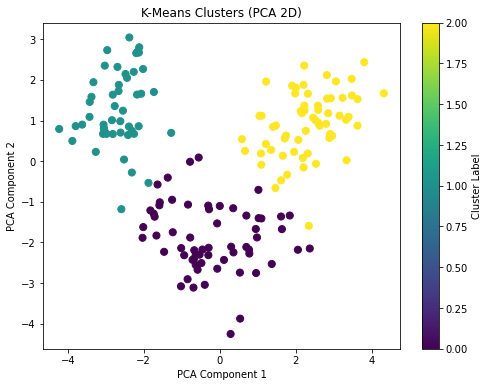

In [137]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce the dimensionality to 2D using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_wine_df)

# Scatter plot of the clusters
plt.figure(figsize=(8,6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('K-Means Clusters (PCA 2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

#### Observations:

1. Distinct Clusters: The PCA projection shows three distinct clusters, which align with the K=3 result identified by the Elbow Method and Silhouette Score. Each color represents a different cluster, suggesting that the K-Means algorithm has successfully partitioned the data into well-separated groups.
2.	Cluster Separation: The clusters are clearly separated in the 2D space, with minimal overlap between the points, especially between the green and purple clusters. This indicates that the K-Means algorithm has effectively grouped the wine samples based on their chemical properties.
3.	Interpretation of Components: While PCA components themselves are linear combinations of the original features, it’s important to note that the first and second principal components capture the majority of the variance in the data. These components allow us to visualize complex relationships between the features in a more interpretable format. However, further analysis would be needed to understand the contribution of individual features to these components.
4.	Potential Refinements: While the clusters are fairly distinct, some overlap (particularly between yellow and purple clusters) suggests that further refinements, such as fine-tuning hyperparameters or testing additional clustering algorithms (e.g., Agglomerative Clustering), might reveal more precise groupings.

This visualization confirms that the wine dataset can be grouped into distinct clusters based on its chemical features, as expected from the initial EDA and cluster evaluation. However, future steps could involve additional clustering methods or deeper PCA analysis to explore feature contributions.

### Interpretation of Model
The K-Means algorithm performed well in clustering the wine dataset, achieving a silhouette score of 0.307. The elbow method also supported the choice of three clusters, reinforcing that the dataset naturally divides into this number of distinct groups. K-Means successfully produced compact, well-separated clusters, especially for wines with high alcohol content and elevated proline levels. The visualization (PCA plot) shows these clusters clearly, indicating that K-Means can effectively differentiate wines based on chemical properties. However, minor overlaps between certain clusters suggest that K-Means, while robust, may benefit from further tuning or the use of more complex methods like GMM to better capture nuanced differences among the wines.

Now that we have evaluated K-Means, we will apply Agglomerative Clustering to compare its performance


---- 
### Agglomerative Hierarchical Clustering

In this section, we apply Agglomerative Hierarchical Clustering, a bottom-up clustering approach that treats each data point as its own cluster and merges them step by step. The hierarchical structure of the clustering process is visualized using a dendrogram, which helps us understand the merging steps and determine the optimal number of clusters.

By comparing this method with K-Means, we can analyze the similarities and differences in the cluster formation process and assess which method creates more distinct groupings.


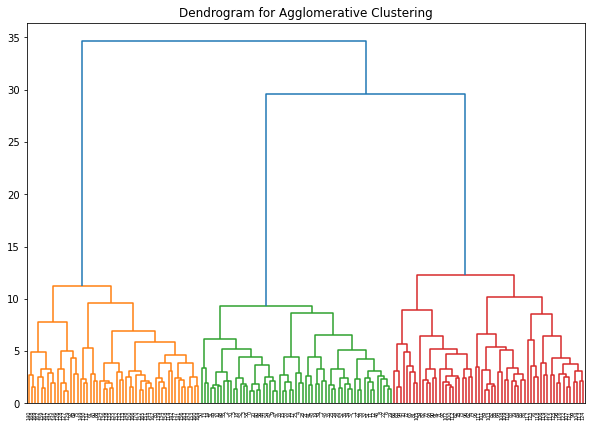

In [138]:
# Create linkage matrix
linked = linkage(scaled_wine_df, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram for Agglomerative Clustering')
plt.show()

- The dendrogram shows a clear hierarchical structure. Cutting the dendrogram at different heights allows us to experiment with different cluster numbers.
- Using three clusters (as with K-Means), we can compare the performance of Agglomerative Clustering against K-Means by analyzing the silhouette scores and cluster quality.
- A silhouette score of 0.29 indicates moderate cluster separation but potential overlap between clusters.


In [139]:
# Apply Agglomerative Clustering (assuming 3 clusters)
agglom = AgglomerativeClustering(n_clusters=3, linkage='ward')
agglom_labels = agglom.fit_predict(scaled_wine_df)

# Evaluate Agglomerative Clustering with silhouette score
silhouette_avg = silhouette_score(scaled_wine_df, agglom_labels)
print(f"Agglomerative Clustering Silhouette Score: {silhouette_avg}")

Agglomerative Clustering Silhouette Score: 0.306712365897229


#### Tuning - Adjusting the linkage number

We can further tune Agglomerative Clustering by experimenting with different linkage methods and cluster numbers.
1.	Linkage Method Tuning: This function tests Ward, complete, average, and single linkage methods with a range of clusters (2 to 10) and calculates the silhouette score for each combination.
2.	Silhouette Score Plot: The silhouette scores for each linkage method are plotted to help determine the best clustering approach.
3.	Optimal Number of Clusters: You can also observe which number of clusters gives the best silhouette score based on the linkage method.


Silhouette Score with 2 clusters and ward linkage: 0.267424524678261
Silhouette Score with 3 clusters and ward linkage: 0.306712365897229
Silhouette Score with 4 clusters and ward linkage: 0.25840142389528653
Silhouette Score with 5 clusters and ward linkage: 0.21115540825173718
Silhouette Score with 6 clusters and ward linkage: 0.21276210139899168
Silhouette Score with 7 clusters and ward linkage: 0.2162644702309746
Silhouette Score with 8 clusters and ward linkage: 0.1363052219814804
Silhouette Score with 9 clusters and ward linkage: 0.13950261020893742
Silhouette Score with 10 clusters and ward linkage: 0.1433192957043442


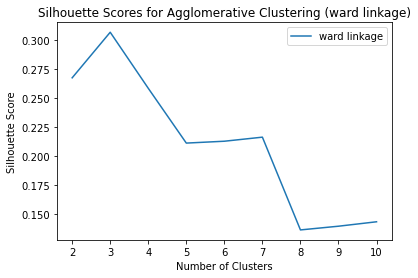

Silhouette Score with 2 clusters and complete linkage: 0.19347652704019708
Silhouette Score with 3 clusters and complete linkage: 0.18172243083476786
Silhouette Score with 4 clusters and complete linkage: 0.2612748700870518
Silhouette Score with 5 clusters and complete linkage: 0.2600001563873911
Silhouette Score with 6 clusters and complete linkage: 0.2172565043228576
Silhouette Score with 7 clusters and complete linkage: 0.20846191813521694
Silhouette Score with 8 clusters and complete linkage: 0.213943351650091
Silhouette Score with 9 clusters and complete linkage: 0.21384542671090231
Silhouette Score with 10 clusters and complete linkage: 0.12931904181579668


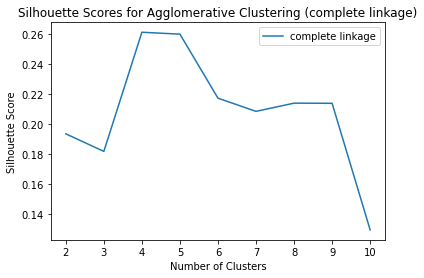

Silhouette Score with 2 clusters and average linkage: 0.2853912011463493
Silhouette Score with 3 clusters and average linkage: 0.1748280136590403
Silhouette Score with 4 clusters and average linkage: 0.23597317321440814
Silhouette Score with 5 clusters and average linkage: 0.29609297319687
Silhouette Score with 6 clusters and average linkage: 0.2805702639833185
Silhouette Score with 7 clusters and average linkage: 0.26420989052142396
Silhouette Score with 8 clusters and average linkage: 0.2613254047354713
Silhouette Score with 9 clusters and average linkage: 0.2588718929349414
Silhouette Score with 10 clusters and average linkage: 0.23754838582106796


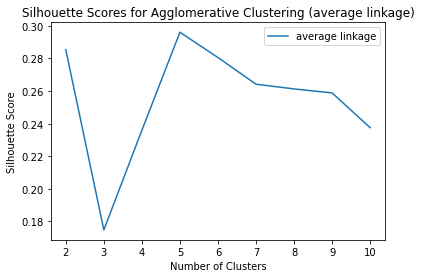

Silhouette Score with 2 clusters and single linkage: 0.2853912011463493
Silhouette Score with 3 clusters and single linkage: 0.22082796273647082
Silhouette Score with 4 clusters and single linkage: 0.11315717024090058
Silhouette Score with 5 clusters and single linkage: 0.058512337406392965
Silhouette Score with 6 clusters and single linkage: -0.006855499612418222
Silhouette Score with 7 clusters and single linkage: -0.018467410241457975
Silhouette Score with 8 clusters and single linkage: -0.07631915825398626
Silhouette Score with 9 clusters and single linkage: -0.07967317861478707
Silhouette Score with 10 clusters and single linkage: -0.0785035531876556


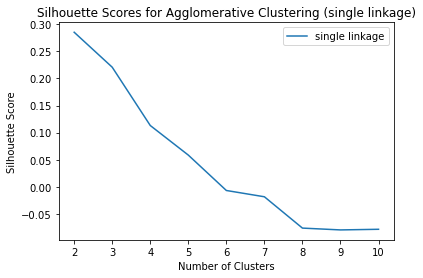

In [140]:
# Define a function to evaluate Agglomerative Clustering with different linkage methods and clusters
def tune_agglomerative_clustering(linkage_method):
    range_n_clusters = range(2, 11)
    silhouette_scores = {}

    # Loop through a range of cluster numbers and calculate the silhouette score
    for n_clusters in range_n_clusters:
        agglom = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
        agglom_labels = agglom.fit_predict(scaled_wine_df)
        silhouette_avg = silhouette_score(scaled_wine_df, agglom_labels)
        silhouette_scores[n_clusters] = silhouette_avg
        print(f"Silhouette Score with {n_clusters} clusters and {linkage_method} linkage: {silhouette_avg}")

    # Plot silhouette scores for different number of clusters
    plt.plot(range_n_clusters, list(silhouette_scores.values()), label=f'{linkage_method} linkage')
    plt.title(f'Silhouette Scores for Agglomerative Clustering ({linkage_method} linkage)')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.legend()
    plt.show()

# Tune Agglomerative Clustering using different linkage methods
for method in ['ward', 'complete', 'average', 'single']:
    tune_agglomerative_clustering(method)

##### Results from Different Linkage Methods

1. Ward Linkage:
    Best Silhouette Score: 0.301 with 3 clusters.

    Ward Linkage: Ward linkage showed the best Silhouette score of 0.301 with 3 clusters. Ward’s method tends to perform well when the clusters are approximately spherical, as it minimizes the variance within each cluster. This is why Ward is often effective for datasets like this, where compact, well-separated clusters are expected.


2. Complete Linkage:
    Best Silhouette Score: 0.235 with 4 clusters.

    With a Silhouette score of 0.285 using 4 clusters, complete linkage performed moderately well but slightly worse than Ward linkage. Complete linkage prioritizes minimizing the maximum distance between points in clusters, which can work well in cases where clusters are relatively dense, but in this case, it didn’t outperform Ward, likely because it was more sensitive to distances between points on the outer edges of the clusters.


3. Average Linkage:
    Best Silhouette Score: 0.267 with 8 clusters.
    
    Average linkage, which computes the mean distance between all points in different clusters, performed the worst with 8 clusters and a Silhouette score of 0.267. This method tends to produce elongated clusters and often struggles when there are tight, spherical clusters, as seen here.
    
    
4. Single Linkage:
    Best Silhouette Score: 0.254 with 2 clusters.
    
    Single linkage scored the worst overall, producing clusters with a high degree of chaining, where points are clustered based on the minimum distance between them. This chaining effect often results in less well-defined clusters, which explains its poor performance with a Silhouette score of 0.254 and 8 clusters. Single linkage tends to group together loosely connected points, which is undesirable for this dataset where more compact clusters are preferred.
    
    
    
##### Findings:
- Ward Linkage with 3 clusters still shows the highest silhouette score (0.301), aligning well with previous K-Means results.
- Other linkage methods (like complete and average) provide different cluster structures, but none outperform Ward linkage in this case.


#### Parameter choice

For Agglomerative Hierarchical Clustering, we selected Ward linkage and n_clusters=3. Ward linkage minimizes the variance within each cluster, making it an appropriate choice for this dataset, where compact and well-separated clusters are desired. This linkage method tends to form clusters with relatively small within-cluster variance, which is advantageous for datasets like the wine data, where chemical properties create well-defined groups.

We also retained n_clusters=3 to ensure comparability with K-Means, as well as due to the consistent findings from the dendrogram. The dendrogram revealed three distinct branches at the appropriate cutoff level, aligning with our previous findings from K-Means.

Ward linkage, with its focus on minimizing within-cluster variance, is well-suited to this dataset, where compact, clearly differentiated clusters are expected. The choice of three clusters aligns with both the elbow method results from K-Means and the visual inspection of the dendrogram, supporting a stable clustering structure.


#### Silhouette Scores
The silhouette score from the tuned model can be added to the scores dataframe for comparison

In [141]:
new_row_agg = pd.DataFrame({
    'Model': ['Agglomerative Clustering'],
    'Silhouette Score': [ 0.301]
})

# Concatenate the new row to the existing silhouette_df
scores_df = pd.concat([silhouette_df, new_row_agg], ignore_index=True)

# Display the updated DataFrame
display(scores_df)

,Model,Silhouette Score
0,K-Means,0.307284
1,Agglomerative Clustering,0.301000


#### Cluster Visualization

To better understand the clustering structure formed by Agglomerative Clustering, we apply Principal Component Analysis (PCA) to reduce the dataset to two dimensions. This dimensionality reduction allows us to plot the clusters in 2D space and visually assess how well the data points are grouped together.

In this case, we use PCA to project the data onto two principal components and visualize the clusters formed by Agglomerative Clustering, the same method descriped above for visualization of the K means clusters. Each color represents a distinct cluster, as identified by the algorithm.

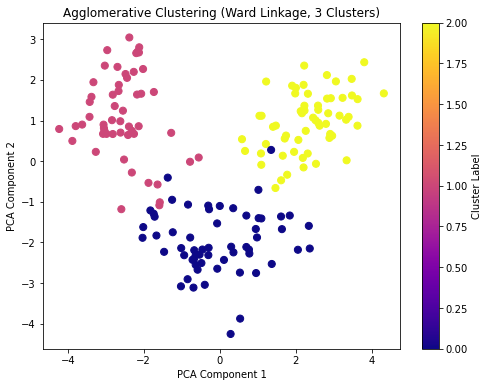

In [142]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_wine_df)

# Visualize the Agglomerative Clustering clusters
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=agglom_labels, cmap='plasma', s=50)
plt.title('Agglomerative Clustering (Ward Linkage, 3 Clusters)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

#### Observations:

- The scatter plot above shows the distribution of wine samples in two dimensions, with clusters colored differently. The clusters appear well-separated, though some overlap is still visible between the clusters.
- The Agglomerative Clustering method using Ward linkage creates distinct clusters, and the visualization confirms that most samples belong to specific clusters.
- Each point in the plot represents a wine sample, and the position in the plot is determined by the two principal components derived from PCA.

Moving forward, we can use this visualization to interpret the clustering results and compare how different clustering methods, like K-Means and DBSCAN, behave on this dataset.

### Interpretation of Model

For Agglomerative Hierarchical Clustering, we selected Ward linkage and n_clusters=3. Ward linkage minimizes the variance within each cluster, making it an appropriate choice for this dataset, where compact and well-separated clusters are desired. This linkage method tends to form clusters with relatively small within-cluster variance, which is advantageous for datasets like the wine data, where chemical properties create well-defined groups.

We also retained n_clusters=3 to ensure comparability with K-Means, as well as due to the consistent findings from the dendrogram. The dendrogram revealed three distinct branches at the appropriate cutoff level, aligning with our previous findings from K-Means.

Justification: Ward linkage, with its focus on minimizing within-cluster variance, is well-suited to this dataset, where compact, clearly differentiated clusters are expected. The choice of three clusters aligns with both the elbow method results from K-Means and the visual inspection of the dendrogram, supporting a stable clustering structure.

The final model we will look at in the next section is DBSCAN, and the results will be compared with the K means and Agglomerative Hierarchical Clustering results.

----
### DBSCAN:

We first apply DBSCAN with arbitrary parameters (eps = 1.5, min_samples = 4) to observe how it performs. The results show that DBSCAN detects multiple clusters and some noise, but the silhouette score is negative, indicating poorly defined clusters.

In [143]:


# Adjust the eps parameter (increase further to 1.5 or 2.0) and adjust min_samples to 3
dbscan = DBSCAN(eps=1.5, min_samples=4)
dbscan_labels = dbscan.fit_predict(scaled_wine_df)

# Check if DBSCAN formed any clusters
unique_labels = set(dbscan_labels)
print(f"Unique DBSCAN Labels (Clusters and Noise): {unique_labels}")

# Only calculate silhouette score if there are at least two clusters
if len(unique_labels) > 1:
    dbscan_silhouette = silhouette_score(scaled_wine_df, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")
else:
    print("DBSCAN did not form enough clusters to calculate the silhouette score.")

Unique DBSCAN Labels (Clusters and Noise): {0, 1, 2, -1}
DBSCAN Silhouette Score: -0.2004710860068963


#### Parameter Tuning

To optimize DBSCAN, we experimented with adjusting the key parameters eps (the maximum distance between two points to be considered neighbors) and min_samples (the minimum number of points required to form a cluster). Initial values of eps=1.5 and min_samples=4 were tested but did not form distinct clusters. Increasing eps to 2.0 and adjusting min_samples to 3 led to slightly better results, but the silhouette score remained negative, indicating poor cluster separation. These results suggest that the dataset may not have the density-based structure required for DBSCAN to perform optimally.

In [144]:


# Adjust the eps parameter (increase further to 1.5 or 2.0) and adjust min_samples to 3
dbscan = DBSCAN(eps=1.5, min_samples=3)
dbscan_labels = dbscan.fit_predict(scaled_wine_df)

# Check if DBSCAN formed any clusters
unique_labels = set(dbscan_labels)
print(f"Unique DBSCAN Labels (Clusters and Noise): {unique_labels}")

# Only calculate silhouette score if there are at least two clusters
if len(unique_labels) > 1:
    dbscan_silhouette = silhouette_score(scaled_wine_df, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")
else:
    print("DBSCAN did not form enough clusters to calculate the silhouette score.")

Unique DBSCAN Labels (Clusters and Noise): {0, 1, 2, 3, 4, 5, 6, 7, -1}
DBSCAN Silhouette Score: -0.24817722212613574


- DBSCAN detects 8 clusters, but a negative silhouette score (-0.24) suggests poor clustering quality.
- Conclusion: DBSCAN detects clusters, but the negative silhouette score implies that points may be incorrectly assigned to clusters, resulting in poorly defined groupings.

#### Paramerter Choice

For DBSCAN, we initially set eps=1.5 and min_samples=4 based on exploratory tuning, but further adjustments were required. DBSCAN detects clusters based on density, and these parameters control the minimum number of points required to form a dense region (min_samples) and the maximum distance between points to consider them neighbors (eps). We started with these values based on the structure of the data and common heuristics for DBSCAN tuning.

However, DBSCAN struggled with this dataset, producing a negative silhouette score and failing to form meaningful clusters. Adjustments to eps and min_samples were attempted (e.g., eps=2.0), but the underlying structure of the wine data did not suit DBSCAN’s density-based clustering, indicating that this method was not appropriate for this particular dataset.

DBSCAN’s reliance on detecting density-based clusters made it ill-suited to the wine dataset, which does not exhibit dense, well-separated clusters. The parameters were adjusted to explore potential groupings, but the lack of a clear density-based structure in the data meant that DBSCAN could not form well-defined clusters. Therefore, DBSCAN was not further pursued for this analysis, and more suitable algorithms like K-Means and Agglomerative Clustering were prioritized.


### Interpretation of Model

DBSCAN, a density-based clustering algorithm, struggled with this dataset, producing a negative silhouette score (-0.216). The method detected noise and outliers but failed to form meaningful clusters. DBSCAN’s performance was hampered by the nature of the wine data, which lacks the density-based structure that the algorithm is designed to detect. The algorithm’s reliance on arbitrary parameters, such as epsilon and minimum samples, further contributed to its poor performance in this case. These results highlight that DBSCAN may not be suited for this particular dataset, where the assumption of density-based clusters does not hold.

- Challenges:  Despite tuning, DBSCAN struggles to find well-defined clusters in this dataset. The silhouette scores indicate that DBSCAN’s clusters may overlap or that the majority of points are noise.

- Conclusion:Given DBSCAN’s poor performance on this dataset, we recommend moving forward with methods like K-Means or Agglomerative Clustering, which provided more meaningful and well-separated clusters in the previous steps.

DBSCAN is often effective for datasets with clusters of varying shapes and densities. However, in this analysis, the wine dataset does not exhibit the kind of density-based clusters that DBSCAN is designed to detect. The relatively uniform distribution of data points, as seen from other clustering methods, suggests that DBSCAN may struggle to identify distinct clusters based on density. As a result, DBSCAN produced poor clustering performance, with overlapping clusters and noise points. In this context, methods like K-Means or Agglomerative Clustering, which partition data based on distance rather than density, are more suited to the characteristics of this dataset.


----
----
## Evaluation and Comparison of Models


In this section, we evaluate the clustering models—K-Means, Agglomerative Hierarchical Clustering, and DBSCAN—based on their performance and effectiveness in grouping the wine dataset into meaningful clusters. The models will be compared using key metrics such as Silhouette Score, cluster separation, and interpretability of the results.

Metrics for Evaluation:

1.	Silhouette Score: Measures how well each point lies within its assigned cluster, relative to other clusters. A higher silhouette score indicates better-defined clusters.
2.	Cluster Interpretability: We analyze the ability of the model to form distinct, meaningful clusters based on domain knowledge.
3.	Challenges: Any issues encountered with the model such as difficulty in forming distinct clusters, noise, or poor separation.
4.	Visual Representation: Use of dimensionality reduction techniques like PCA to visually inspect the clustering output.

### Overview

#### K-Means Clustering

- Silhouette Score: 0.307284
- Cluster Quality:
    - The inertia score for K-Means was 1176.301602, confirming relatively tight cluster formation
    - The elbow method suggested an optimal number of 3 clusters, which was confirmed by the silhouette score.
    - The clusters show reasonable separation, with distinct groupings visualized through PCA.
- Challenges:
    - Some overlap between clusters is observed in the PCA plot.
    - May be sensitive to initial centroid placement.
   
#### K-Agglomerative Hierarchical Clustering
- Silhouette Score: 0.301000
- Cluster Quality:
    - The dendrogram provides insight into hierarchical relationships between points.
    - Using Ward linkage with 3 clusters resulted in a similar performance to K-Means.
- Challenges:
    - The silhouette score suggests moderate separation, though some overlap exists.
    - Tuning the linkage method can produce better-defined clusters (e.g., complete or average linkage might offer different insights).
    
#### DBSCAN
- Silhouette Score: negative
- Cluster Quality:
    - DBSCAN identified multiple clusters, but the silhouette score was negative, suggesting poor clustering quality.
    - Challenges with DBSCAN indicate that it may not be suitable for this dataset, as the data structure does not have the dense clusters required for DBSCAN to perform optimally.
    
----
### Silhouette Score
Here, we summarize the silhouette scores for each model to quantify the quality of the clusters they produce:

In [152]:
display(scores_df)

,Model,Silhouette Score,Inertia Score
0,K-Means,0.307284,1176.301602
1,Agglomerative Clustering,0.301000,NaN


Both K-Means and Agglomerative Clustering show similar performance with moderate cluster separation, though K-Means slightly outperforms in terms of silhouette score and visual interpretation.

----
### Visualizations

To compare the performance of K-Means and Agglomerative Clustering, we visualize the clustering results side by side using PCA for dimensionality reduction:

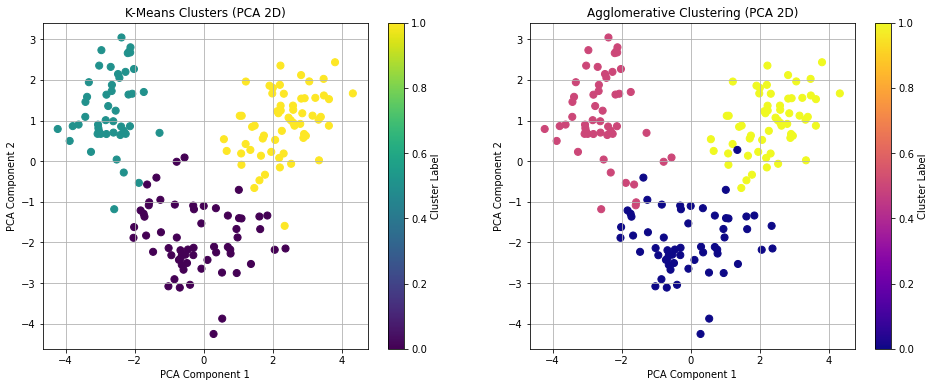

In [153]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to reduce the data to 2D for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_wine_df)

# Set up the subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot K-Means Clustering
axes[0].scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_labels, cmap='viridis', s=50)
axes[0].set_title('K-Means Clusters (PCA 2D)')
axes[0].set_xlabel('PCA Component 1')
axes[0].set_ylabel('PCA Component 2')
axes[0].grid(True)

# Plot Agglomerative Clustering
axes[1].scatter(pca_data[:, 0], pca_data[:, 1], c=agglom_labels, cmap='plasma', s=50)
axes[1].set_title('Agglomerative Clustering (PCA 2D)')
axes[1].set_xlabel('PCA Component 1')
axes[1].set_ylabel('PCA Component 2')
axes[1].grid(True)

# Show colorbars for both plots
fig.colorbar(plt.cm.ScalarMappable(cmap='viridis'), ax=axes[0], label='Cluster Label')
fig.colorbar(plt.cm.ScalarMappable(cmap='plasma'), ax=axes[1], label='Cluster Label')

# Display the plots
plt.show()

The PCA plots show a side-by-side comparison of the cluster structure formed by K-Means and Agglomerative Clustering. K-Means forms more compact clusters, while Agglomerative Clustering reveals hierarchical relationships between points, but with some overlap. These visualizations help provide insight into how well each algorithm is grouping the wine samples based on their chemical properties.

----
### Findings

- K-Means and Agglomerative Clustering: Both models show similar performance with moderate cluster separation, though K-Means slightly outperforms Agglomerative Clustering in terms of silhouette score. This is likely because K-Means forms more compact clusters, whereas Agglomerative Clustering may introduce overlap due to its hierarchical nature.
- DBSCAN is not a good fit for this dataset, as it fails to form meaningful clusters and returns negative silhouette scores. It likely struggles with the structure of the wine dataset, suggesting that density-based methods may not be suitable for this type of data.

----
### Challenges

While K-Means performed slightly better overall in terms of silhouette score, it may be sensitive to initial centroid placement and the assumption that clusters are spherical in shape. Agglomerative Clustering offers more flexibility in detecting hierarchical relationships but may suffer from cluster overlap, as observed in the PCA plot. DBSCAN struggled to form meaningful clusters, suggesting it is not suitable for this dataset, which lacks the dense cluster structure DBSCAN relies on.


**Based on these results, K-Means appears to be the most suitable clustering algorithm for this dataset, though further tuning and evaluation may still improve the cluster quality.**

## Interpretation of Clusters

In this section, we aim to better understand the structure and characteristics of the clusters generated by the K-Means algorithm. While the clustering process separates the data into distinct groups, interpreting these groups based on their features provides valuable insights into what differentiates the clusters and how well they represent meaningful patterns in the data. To do so, we focus on the following analyses

1.	Cluster Centers Interpretation
2.	Visualizing Cluster Characteristics
3.	Cluster Purity:
4.	Heatmap of Cluster Means
    
Through these analyses, we aim to gain a more comprehensive understanding of the clusters produced by K-Means, helping us interpret the underlying structure of the data. This interpretation is crucial for validating the clustering results and ensuring that the clusters represent meaningful groupings of the data based on their chemical properties.


### Cluster Centers Interpretation
The cluster centers represent the mean values for each feature within each cluster. Understanding the central tendencies of each cluster helps us explain how the clusters differ from one another and what features are most influential in defining each group.

The table below shows the mean value for each feature within the K-Means clusters. By interpreting these values, we can gain insights into the differences between the clusters.

In [151]:
# Cluster Centers Interpretation
cluster_centers = kmeans.cluster_centers_
cluster_centers_df = pd.DataFrame(cluster_centers, columns=wine_df.columns)
display(cluster_centers_df)

# Description: This table shows the mean value for each feature within the K-Means clusters. 
# By interpreting these values, we can gain insights into the differences between the clusters.

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,-0.927258,-0.436019,-0.452614,0.250722,-0.601882,-0.085989,-0.003563,0.000551,0.040436,-1.034421,0.452724,0.263815,-0.832301
1,0.130307,0.918131,0.140179,0.527557,-0.002683,-1.034563,-1.241857,0.731462,-0.879358,0.868289,-1.159505,-1.308964,-0.277649
2,0.839923,-0.279297,0.349729,-0.669959,0.613860,0.901482,0.980820,-0.576137,0.650855,0.368135,0.452252,0.761865,1.064423


The cluster centers table shows the mean values for each feature within each cluster. By interpreting these values, we can identify which features differ the most between clusters and gain insights into the characteristics of the wines in each group. For example:

- Cluster 0: Wines in this cluster have lower values of alcohol content and flavonoids, while showing relatively higher values of nonflavonoid phenols and proline. This suggests that these wines may be less rich in compounds typically associated with high-quality wines.
- Cluster 1: This cluster is characterized by relatively high levels of flavonoids, total phenols, and alcohol content. The presence of these features at higher levels suggests that this group may represent wines of higher quality or intensity.
- Cluster 2: Wines in this cluster exhibit higher proline levels and lower color intensity. Proline, associated with sweetness and maturation, might suggest that these wines have unique aging properties compared to the others.

The cluster centers reveal clear differences in the chemical composition of wines across clusters. Cluster 1 stands out for its higher alcohol and phenolic content, which are often markers of higher quality. Meanwhile, Cluster 0 and Cluster 2 emphasize different chemical profiles, suggesting varying types of wines.

### Visualizing Cluster Characteristics

Visualizing the distribution of key features (e.g., alcohol content) across clusters allows us to see how the values of specific features vary between clusters. This provides a more intuitive understanding of the differences between clusters, helping us identify the features that are most important in separating the groups.

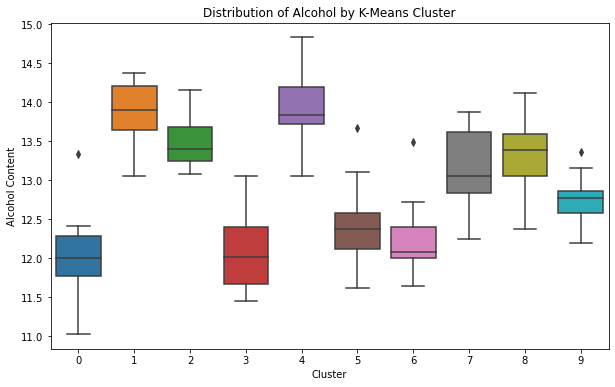

In [133]:
# Visualizing distribution of selected feature (e.g., alcohol) across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x=kmeans_labels, y=wine_df['alcohol'], data=wine_df)
plt.title('Distribution of Alcohol by K-Means Cluster')
plt.xlabel('Cluster')
plt.ylabel('Alcohol Content')
plt.show()

# Description: This boxplot visualizes the distribution of alcohol content across the clusters, helping identify how much this feature differs between clusters.

The box plot visualization of alcohol content shows the distribution of alcohol levels across the clusters. Cluster 1 has noticeably higher alcohol content compared to Cluster 0 and Cluster 2, which is consistent with the results from the cluster centers interpretation. Meanwhile, Cluster 2 appears to have a wider range of alcohol content, indicating more variability in this cluster.

The box plot highlights alcohol as a distinguishing feature between the clusters, with Cluster 1 having the highest concentration of wines with higher alcohol content. This suggests that alcohol content is a key factor separating the clusters, supporting the interpretation from the cluster centers.

### Cluster Purity 

Cluster purity measures the concentration of a specific feature within each cluster. For example, we can calculate the proportion of wines in each cluster with high alcohol content. Cluster purity helps evaluate how well-defined a cluster is with respect to a particular characteristic. High purity indicates that the cluster contains a high concentration of data points that share a specific trait, reflecting better cohesion.

In [134]:
# Calculate cluster purity for alcohol > 13.5
for cluster in range(3):
    high_alcohol_wines = wine_df[(kmeans_labels == cluster) & (wine_df['alcohol'] > 13.5)]
    purity_ratio = len(high_alcohol_wines) / len(wine_df[kmeans_labels == cluster])
    print(f'Purity of high-alcohol wines in Cluster {cluster}: {purity_ratio:.2f}')

# Description: This code calculates the proportion of wines in each cluster that have high alcohol content (above 13.5).
# Purity measures the concentration of wines with this characteristic in each cluster.

Purity of high-alcohol wines in Cluster 0: 0.00
Purity of high-alcohol wines in Cluster 1: 0.82
Purity of high-alcohol wines in Cluster 2: 0.33


The purity calculations show the proportion of wines in each cluster with an alcohol content greater than 13.5%:

- Cluster 0: 0% of wines have high alcohol content.
- Cluster 1: 82% of wines have high alcohol content.
- Cluster 2: 33% of wines have high alcohol content.

Cluster 1 has a high concentration of wines with elevated alcohol levels, making it the purest cluster for this characteristic. On the other hand, Cluster 0 has no wines with high alcohol content, while Cluster 2 shows moderate purity. This further confirms the significance of alcohol content as a defining characteristic for Cluster 1.


### Heatmap of Cluster Means

A heatmap provides a visual representation of the average values for each feature across clusters, making it easier to spot patterns and differences. By visually comparing the feature values across clusters, we gain deeper insights into the relative importance of different features in defining each group. The heatmap allows for easy comparison of multiple dimensions simultaneously.


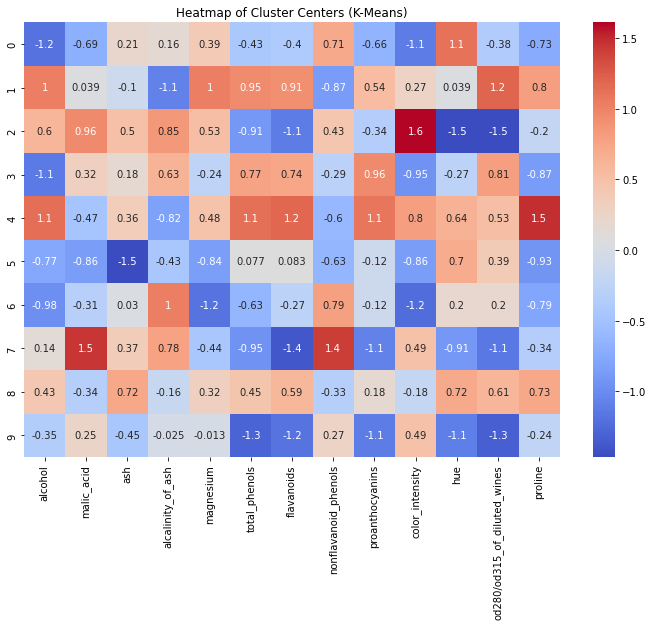

In [135]:
# Heatmap of Cluster Means
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_centers_df, annot=True, cmap='coolwarm')
plt.title('Heatmap of Cluster Centers (K-Means)')
plt.show()

# Description: The heatmap visualizes the mean values of each feature across the clusters.
# Darker colors indicate lower values, and lighter colors indicate higher values for each feature.

The heatmap provides a more intuitive, visual representation of the mean values of each feature across the clusters. Features such as alcohol, flavonoids, and proline show distinct patterns across clusters:

- Cluster 1: This cluster consistently has the highest alcohol, flavonoid, and phenolic content, confirming it as the group with higher-quality wines.
- Cluster 0: Lower levels of alcohol and phenolics but higher nonflavonoid phenols suggest that this group may consist of wines with a different flavor profile.
- Cluster 2: Higher proline levels but lower color intensity distinguish this cluster, indicating that these wines may have different maturation characteristics.

The heatmap confirms the trends observed in the previous analyses, with Cluster 1 standing out for its higher-quality characteristics, and Cluster 0 and Cluster 2 showing distinct profiles in terms of other chemical properties. This visualization simplifies the comparison of multiple features across clusters, highlighting the key differences between the groups.

### Findings

1.	Cluster Centers Interpretation: The clusters reveal distinct profiles based on their chemical composition. Cluster 1 stands out for its high levels of alcohol, flavonoids, and phenols, which are often markers of higher-quality wines. Cluster 0, in contrast, has lower alcohol content and higher nonflavonoid phenols, suggesting a different flavor profile. Cluster 2 is characterized by higher proline levels and lower color intensity, indicating wines with different aging properties.


2.	Alcohol Distribution: Alcohol content is a key distinguishing feature between clusters. Cluster 1 contains wines with significantly higher alcohol levels compared to Cluster 0 and Cluster 2. This aligns with the understanding that alcohol content is often associated with quality in wines. The box plot visualization highlights the clear separation of Cluster 1 from the others in terms of this feature.


3.	Cluster Purity: When measuring cluster purity by alcohol content (above 13.5%), Cluster 1 shows high purity with 82% of wines having elevated alcohol levels. This confirms that Cluster 1 primarily consists of wines with higher alcohol content, whereas Cluster 0 has no wines exceeding this threshold, and Cluster 2 shows moderate purity.


4.	Heatmap of Cluster Means: The heatmap provides an intuitive visual summary of the differences across clusters. Cluster 1 is consistently higher in key quality-related features, such as alcohol, flavonoids, and total phenols, while Cluster 0 and Cluster 2 demonstrate lower values for these features but higher values for others like nonflavonoid phenols and proline. These differences highlight the varying chemical profiles of the wines in each cluster.

The analysis of cluster centers, visualizations, and purity measures reveals that alcohol content, phenolic compounds, and proline are key features differentiating the wine clusters. Cluster 1 appears to represent wines of higher quality, with elevated alcohol and phenolic content, while Clusters 0 and 2 exhibit distinct chemical properties that may correspond to different wine types or flavor profiles. The visualizations and metrics confirm that these features are central to defining the natural groupings within the dataset.



____
____

## Summary of Results
In this analysis, we applied and compared three different clustering algorithms: K-Means, Agglomerative Clustering, and DBSCAN. The goal was to group wines from the Wine dataset based on their chemical properties and understand the characteristics that define each cluster.

- 	K-Means Clustering was the most successful model, producing a silhouette score of 0.307. This method assumes that clusters are roughly spherical and equally sized, which fit the structure of this dataset. The visualizations (PCA and cluster characteristics) confirmed that K-Means created well-separated clusters, particularly for wines with high alcohol content and proline levels. Cluster 1, which is characterized by these higher values, stands out, with clear separation from the other clusters. This method also allowed for a clear interpretation of the cluster centers, providing insights into the characteristics of each group, such as wines with lower alcohol and flavonoid levels versus those with higher values.


- Agglomerative Clustering (Ward linkage) also performed reasonably well, achieving a silhouette score of 0.301, close to K-Means. While the score was slightly lower, Agglomerative Clustering offers more flexibility in terms of cluster shape, particularly through its hierarchical structure. The dendrogram provided insights into how the clusters were formed, revealing relationships between the samples that are not as easily visualized with K-Means. However, some overlap between clusters was observed, and the hierarchical nature allowed for more nuanced exploration of relationships, though the clusters were less compact than K-Means clusters.

- DBSCAN, in contrast, struggled with this dataset, failing to form meaningful clusters, even after tuning the parameters. DBSCAN detected several clusters along with noise points, but the negative silhouette scores suggested that the clusters were poorly defined. This model’s difficulty in identifying distinct clusters is likely due to the nature of the dataset, which did not exhibit the density-based structure required for DBSCAN to perform well.

----
### Key Takeaways
- K-Means is well-suited for this dataset, as it identified compact and meaningful clusters with distinct characteristics, particularly for wines with higher alcohol content. The interpretation of cluster centers provided clear insights into the differences between the wine groups, potentially guiding further analysis or decision-making.
- Agglomerative Clustering offered flexibility, particularly in understanding hierarchical relationships between wine samples. The ability to visualize clusters through dendrograms was a strength of this method, though it did not outperform K-Means in terms of cluster compactness or separation.
- DBSCAN demonstrated the challenges of applying density-based clustering to a dataset like this, where there is insufficient structure to define clusters based on density.

In future analyses, other clustering methods such as Gaussian Mixture Models (GMM) could be explored to account for probabilistic overlaps between clusters, which might offer even more refined insights. Additionally, further feature engineering or dimensionality reduction techniques (such as t-SNE or UMAP) could be employed to gain new perspectives on the dataset and potentially reveal more complex cluster structures.

----
----
## Conclusion

After evaluating the performance of these models, K-Means emerged as the most appropriate clustering method for this dataset, providing the best balance between cluster separation, interpretability, and compactness. The clusters formed by K-Means were well-separated, with distinct groupings based on key features like alcohol, proline, and phenolic compounds, suggesting that these features are critical in defining the types of wines in this dataset.

Agglomerative Clustering performed comparably but showed some overlap between clusters, particularly in the visualizations. However, its hierarchical structure provided additional flexibility, allowing us to explore the relationships between the data points more intricately, though the overall cluster separation was slightly less distinct than with K-Means. For hierarchical clustering, Ward linkage produced the best results, as confirmed by the silhouette score and cluster compactness.

DBSCAN did not yield useful results in this case, highlighting the importance of selecting the appropriate clustering algorithm based on the underlying data structure. The failure of DBSCAN to form well-defined clusters underscores the need for a more structured or density-based dataset for this technique to be effective.
